In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [ ]:
#from scipy.stats import gaussian_kde
#kde = gaussian_kde(data)
#density = kde.evaluate(grid)

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train)

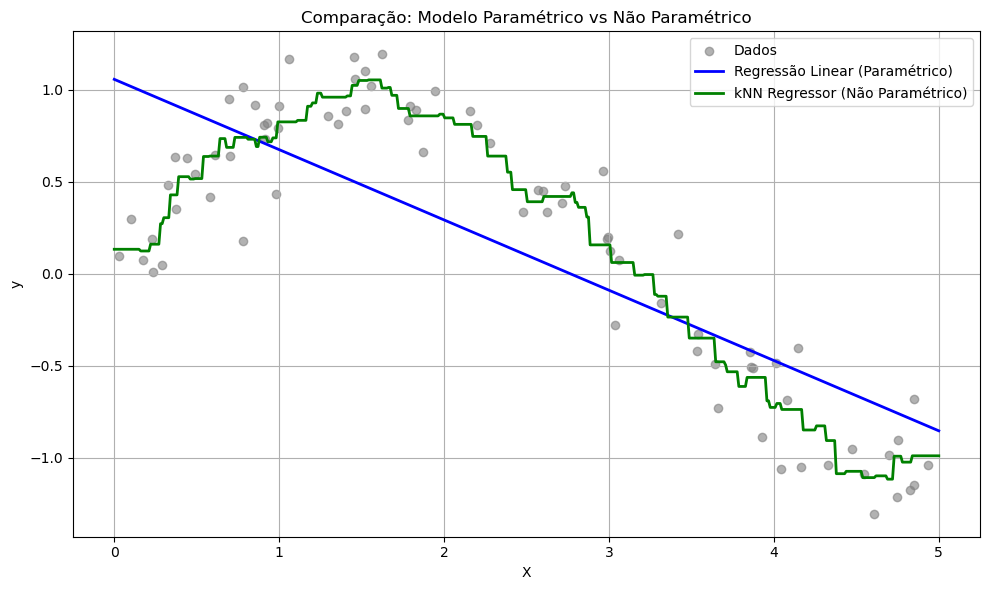

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Gerar dados não lineares
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(80)

# Criar grid para visualização
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# Regressão Linear (modelo paramétrico)
lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X_test)

# kNN Regressor (modelo não paramétrico)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)
y_knn = knn.predict(X_test)

# Plotando
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", label="Dados", alpha=0.6)
plt.plot(X_test, y_lr, label="Regressão Linear (Paramétrico)", color="blue", linewidth=2)
plt.plot(X_test, y_knn, label="kNN Regressor (Não Paramétrico)", color="green", linewidth=2)
plt.title("Comparação: Modelo Paramétrico vs Não Paramétrico")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

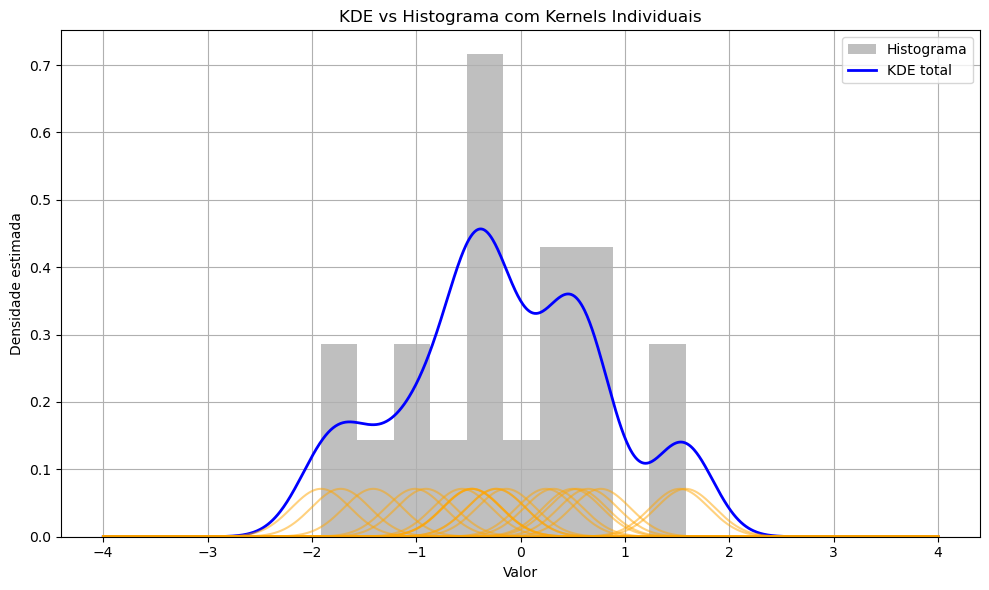

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Gerar dados de exemplo
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=20)

# Estimar a densidade com KDE
kde = gaussian_kde(data, bw_method=0.3)  # Bandwidth ajustável
x_grid = np.linspace(-4, 4, 1000)
kde_values = kde.evaluate(x_grid)

# Plot
plt.figure(figsize=(10, 6))

# Histograma
plt.hist(data, bins=10, density=True, alpha=0.5, color='gray', label='Histograma')

# Curva KDE total
plt.plot(x_grid, kde_values, label='KDE total', color='blue', linewidth=2)

# Mostrar kernels individuais
for xi in data:
    kernel = norm(loc=xi, scale=kde.factor * data.std())
    plt.plot(x_grid, kernel.pdf(x_grid) / len(data), color='orange', alpha=0.5)

# Destaques
plt.title("KDE vs Histograma com Kernels Individuais")
plt.xlabel("Valor")
plt.ylabel("Densidade estimada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

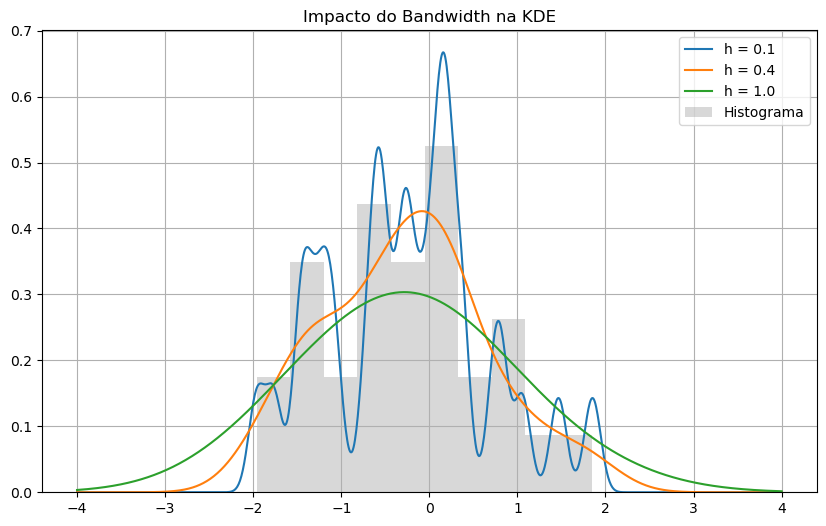

In [21]:
# Comparação visual de diferentes bandwidths
from scipy.stats import gaussian_kde

bandwidths = [0.1, 0.4, 1.0]
x_grid = np.linspace(-4, 4, 1000)
data = np.random.normal(0, 1, size=30)

plt.figure(figsize=(10, 6))
for bw in bandwidths:
    kde = gaussian_kde(data, bw_method=bw)
    plt.plot(x_grid, kde.evaluate(x_grid), label=f'h = {bw}')
plt.hist(data, bins=10, density=True, alpha=0.3, color='gray', label='Histograma')
plt.title("Impacto do Bandwidth na KDE")
plt.legend()
plt.grid(True)
plt.show()

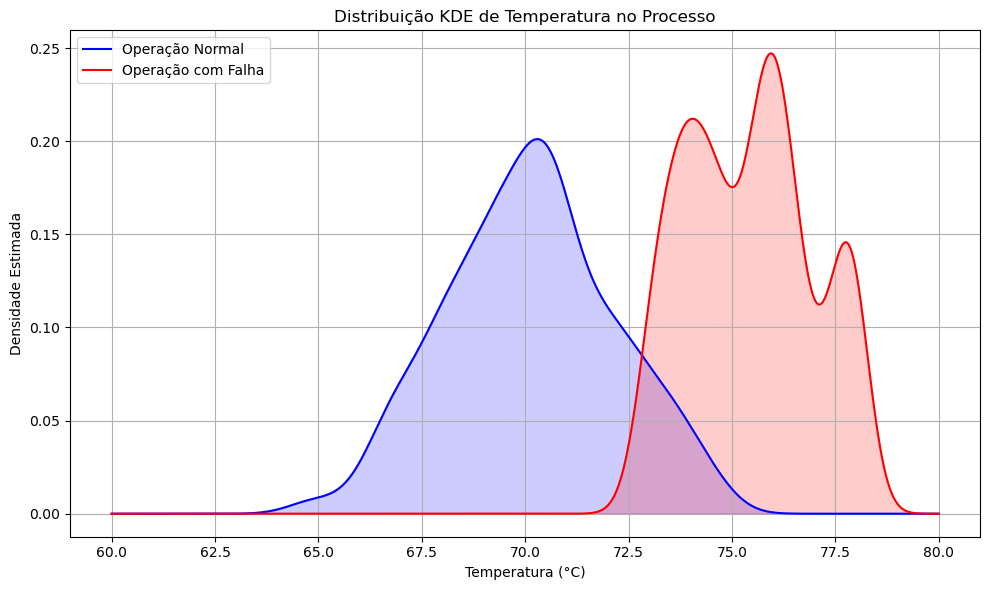

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Simulando dados de temperatura em processo industrial
np.random.seed(0)
normal_operation = np.random.normal(loc=70, scale=2, size=100)
faulty_operation = np.random.normal(loc=75, scale=1.5, size=40)

# Geração do eixo x
x_grid = np.linspace(60, 80, 1000)

# Estimando densidades
kde_normal = gaussian_kde(normal_operation, bw_method=0.3)
kde_faulty = gaussian_kde(faulty_operation, bw_method=0.3)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(x_grid, kde_normal.evaluate(x_grid), label='Operação Normal', color='blue')
plt.plot(x_grid, kde_faulty.evaluate(x_grid), label='Operação com Falha', color='red')
plt.fill_between(x_grid, kde_normal.evaluate(x_grid), alpha=0.2, color='blue')
plt.fill_between(x_grid, kde_faulty.evaluate(x_grid), alpha=0.2, color='red')

plt.title("Distribuição KDE de Temperatura no Processo")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Densidade Estimada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

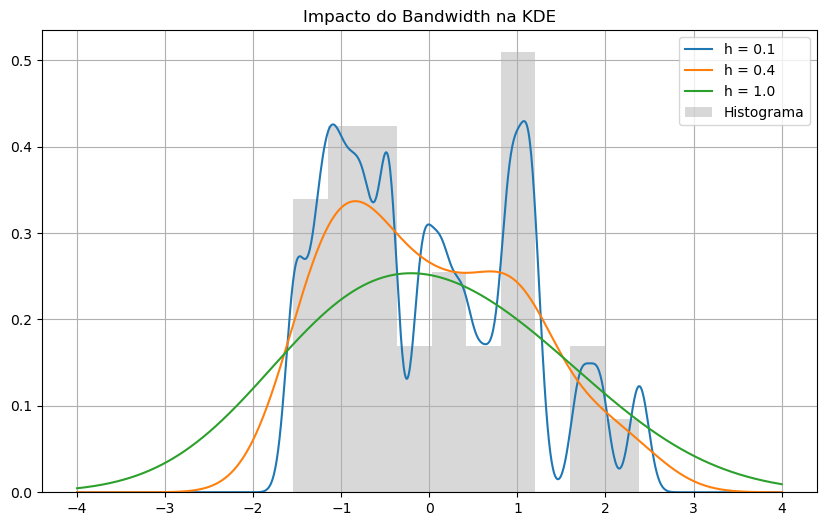

In [25]:
# Comparação visual de diferentes bandwidths
from scipy.stats import gaussian_kde

bandwidths = [0.1, 0.4, 1.0]
x_grid = np.linspace(-4, 4, 1000)
data = np.random.normal(0, 1, size=30)

plt.figure(figsize=(10, 6))
for bw in bandwidths:
    kde = gaussian_kde(data, bw_method=bw)
    plt.plot(x_grid, kde.evaluate(x_grid), label=f'h = {bw}')
plt.hist(data, bins=10, density=True, alpha=0.3, color='gray', label='Histograma')
plt.title("Impacto do Bandwidth na KDE")
plt.legend()
plt.grid(True)
plt.show()

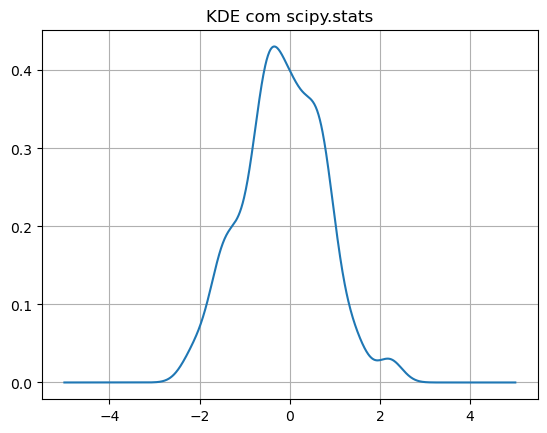

In [27]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Gerando dados simulados
data = np.random.normal(0, 1, size=100)

# Criando a função KDE
kde = gaussian_kde(data, bw_method=0.3)

# Grid para visualização
x_grid = np.linspace(-5, 5, 1000)

# Plotando
plt.plot(x_grid, kde.evaluate(x_grid))
plt.title("KDE com scipy.stats")
plt.grid(True)
plt.show()


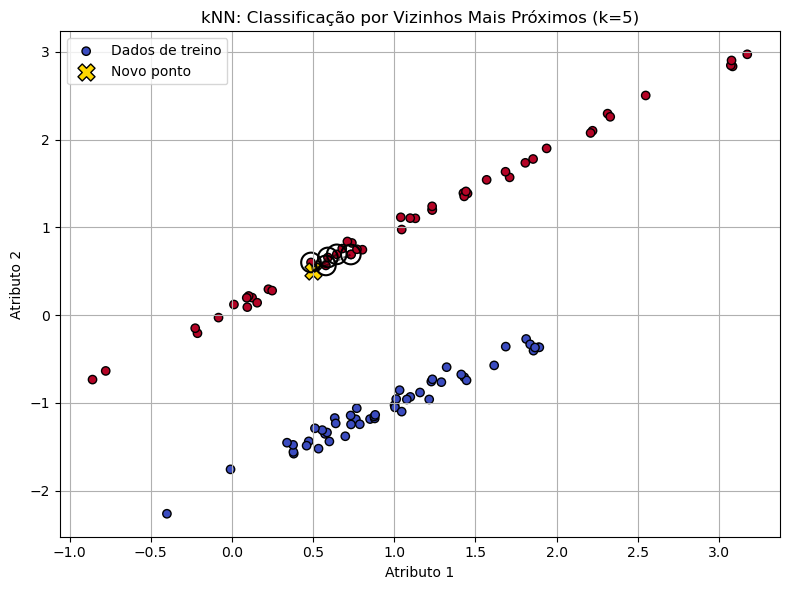

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Gerar dados simulados de classificação binária
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2)

# Criar um ponto novo para classificar
new_point = np.array([[0.5, 0.5]])

# Treinar kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Obter vizinhos mais próximos
_, indices = knn.kneighbors(new_point)

# Plotar
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', label='Dados de treino')
plt.scatter(new_point[0, 0], new_point[0, 1], c='gold', edgecolor='black',
            s=150, marker='X', label='Novo ponto')

# Destacar vizinhos
for idx in indices[0]:
    plt.plot([new_point[0, 0], X[idx, 0]], [new_point[0, 1], X[idx, 1]],
             'k--', alpha=0.6)
    plt.scatter(X[idx, 0], X[idx, 1], s=200, facecolors='none',
                edgecolors='black', linewidths=1.5)

plt.title("kNN: Classificação por Vizinhos Mais Próximos (k=5)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

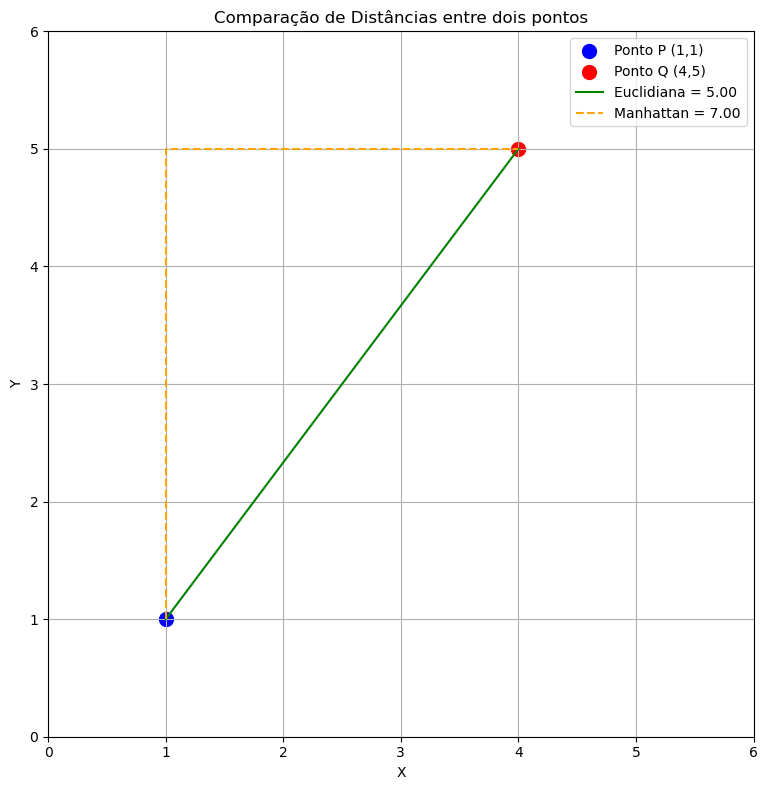

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Pontos de exemplo
p = np.array([1, 1])
q = np.array([4, 5])

# Calculando distâncias
def euclidean(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

def manhattan(p, q):
    return np.sum(np.abs(p - q))

def minkowski(p, q, p_order):
    return np.sum(np.abs(p - q) ** p_order) ** (1 / p_order)

# Valores
euclid = euclidean(p, q)
manhat = manhattan(p, q)
minko3 = minkowski(p, q, 3)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(*p, color='blue', label='Ponto P (1,1)', s=100)
plt.scatter(*q, color='red', label='Ponto Q (4,5)', s=100)

# Distância Euclidiana (reta)
plt.plot([p[0], q[0]], [p[1], q[1]], color='green', linestyle='-', label=f'Euclidiana = {euclid:.2f}')

# Distância Manhattan (em "L")
plt.plot([p[0], p[0], q[0]], [p[1], q[1], q[1]], color='orange', linestyle='--', label=f'Manhattan = {manhat:.2f}')

# Anotação
plt.title("Comparação de Distâncias entre dois pontos")
plt.legend()
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

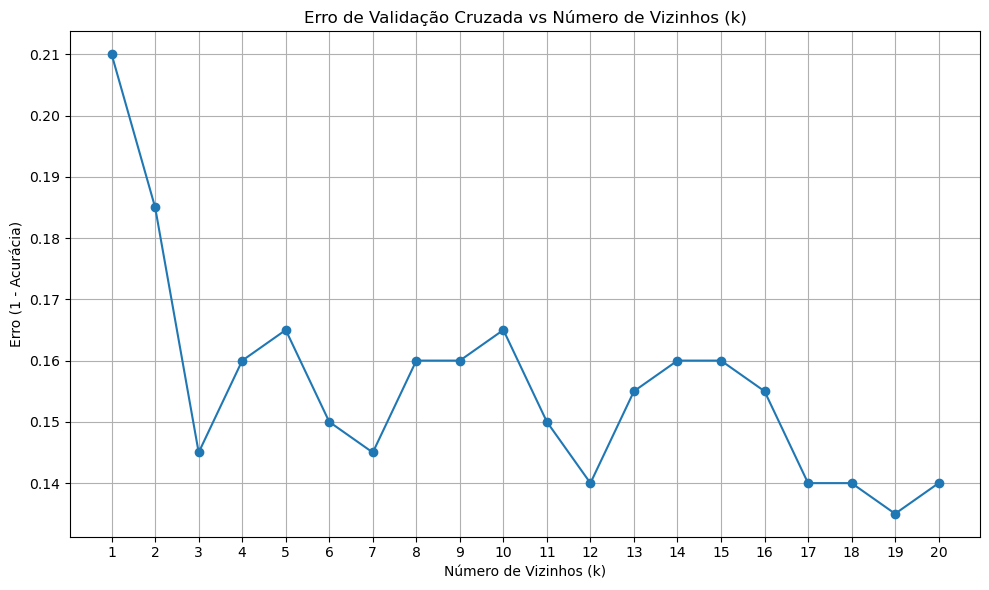

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Gerar dados sintéticos
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Testar vários valores de k
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(1 - scores.mean())  # erro = 1 - acurácia

# Plotando o erro de validação cruzada em função de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title("Erro de Validação Cruzada vs Número de Vizinhos (k)")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Erro (1 - Acurácia)")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

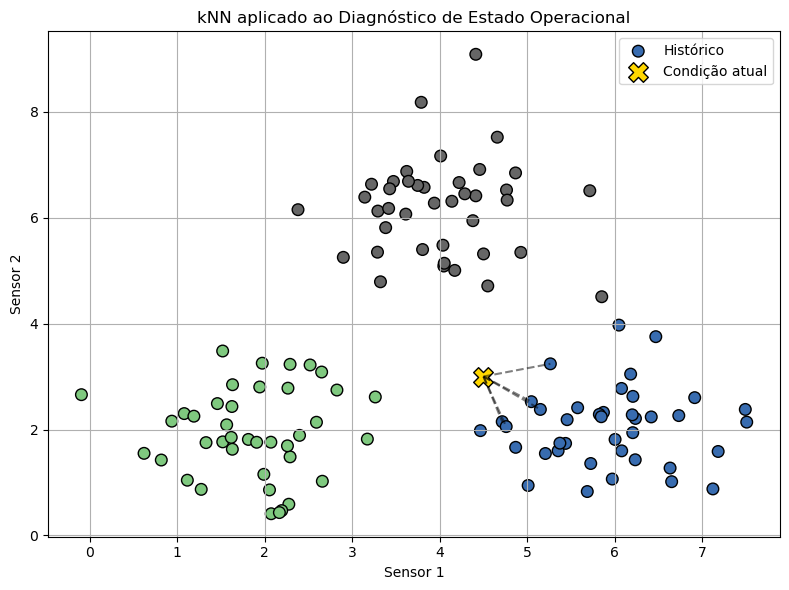

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Simular dados de três estados operacionais
X, y = make_blobs(n_samples=120, centers=[(2, 2), (6, 2), (4, 6)],
                  cluster_std=0.8, random_state=42)

# Novo ponto (condição atual do processo)
new_point = np.array([[4.5, 3]])

# Modelo kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
_, indices = knn.kneighbors(new_point)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent', s=70, edgecolor='k', label='Histórico')
plt.scatter(new_point[:, 0], new_point[:, 1], c='gold', edgecolor='black', s=200, marker='X', label='Condição atual')

# Linhas até os vizinhos mais próximos
for idx in indices[0]:
    plt.plot([new_point[0, 0], X[idx, 0]], [new_point[0, 1], X[idx, 1]],
             'k--', alpha=0.5)

plt.title("kNN aplicado ao Diagnóstico de Estado Operacional")
plt.xlabel("Sensor 1")
plt.ylabel("Sensor 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

new_data = [[0.2, -0.8]]
prediction = knn.predict(new_data)

accuracy = knn.score(X, y)
print(f"Acurácia: {accuracy:.2f}")


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

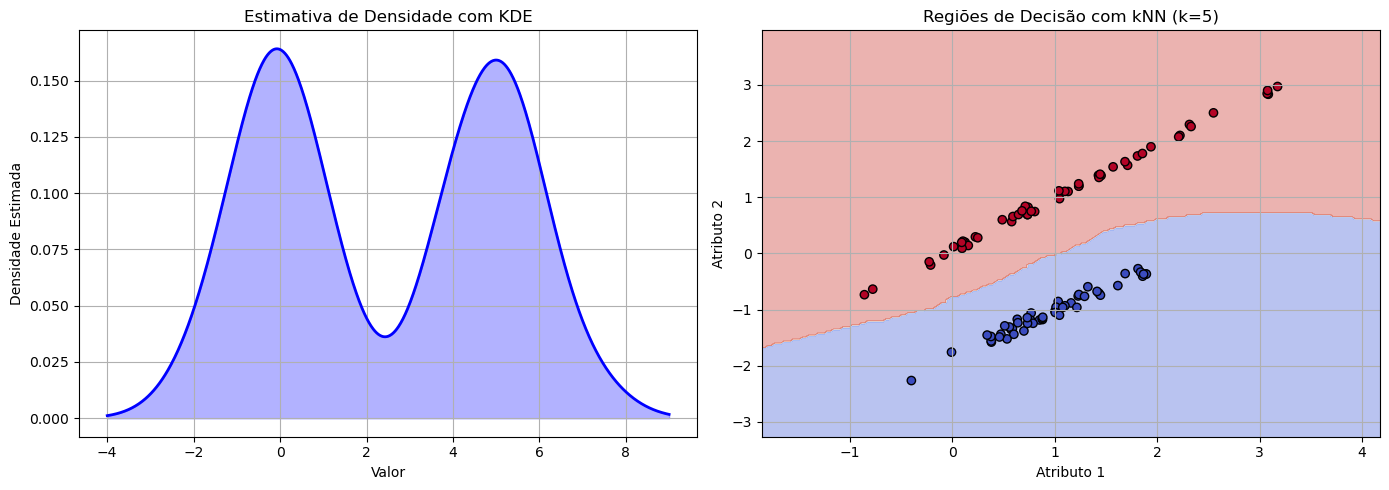

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import gaussian_kde

# Dados para KDE
np.random.seed(42)
data_kde = np.concatenate([np.random.normal(0, 1, 100), np.random.normal(5, 1, 100)])
x_grid = np.linspace(-4, 9, 1000)
kde = gaussian_kde(data_kde, bw_method=0.3)
kde_vals = kde.evaluate(x_grid)

# Dados para kNN
X_knn, y_knn = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, n_classes=2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_knn, y_knn)

# Malha para fronteira de decisão
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico KDE
axs[0].plot(x_grid, kde_vals, color='blue', lw=2)
axs[0].fill_between(x_grid, kde_vals, color='blue', alpha=0.3)
axs[0].set_title("Estimativa de Densidade com KDE")
axs[0].set_xlabel("Valor")
axs[0].set_ylabel("Densidade Estimada")
axs[0].grid(True)

# Gráfico kNN
axs[1].contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
axs[1].scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap='coolwarm')
axs[1].set_title("Regiões de Decisão com kNN (k=5)")
axs[1].set_xlabel("Atributo 1")
axs[1].set_ylabel("Atributo 2")
axs[1].grid(True)

plt.tight_layout()
plt.show()

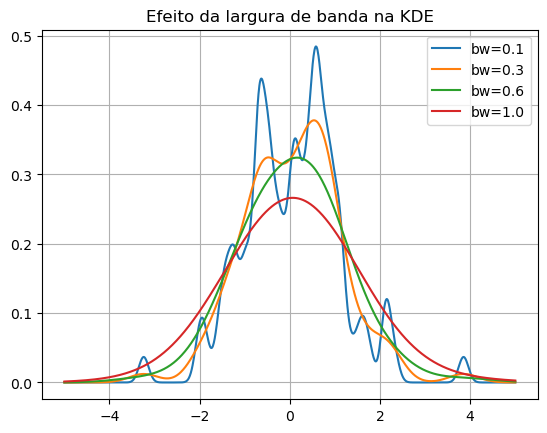

In [40]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(0, 1, 100)

x_grid = np.linspace(-5, 5, 1000)

for bw in [0.1, 0.3, 0.6, 1.0]:
    kde = gaussian_kde(data, bw_method=bw)
    plt.plot(x_grid, kde.evaluate(x_grid), label=f"bw={bw}")
plt.legend()
plt.title("Efeito da largura de banda na KDE")
plt.grid()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for k in [1, 3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia com k={k}: {acc:.2f}")

Acurácia com k=1: 1.00
Acurácia com k=3: 1.00
Acurácia com k=5: 1.00
Acurácia com k=10: 1.00
Acurácia com k=20: 1.00
